In [71]:
import pandas as pd 
import numpy as np   

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import sklearn       
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from scipy import stats

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

In [3]:
url = 'https://github.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/blob/main/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [4]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [5]:
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [6]:
advertising_df.shape

(1199, 5)

In [7]:
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# EDA

<Axes: >

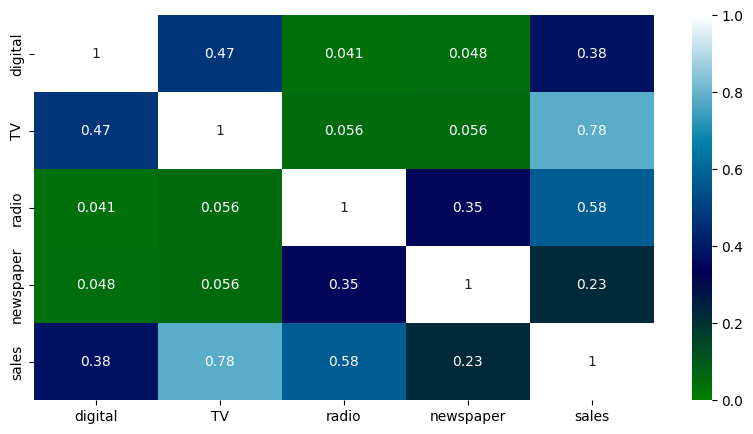

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')

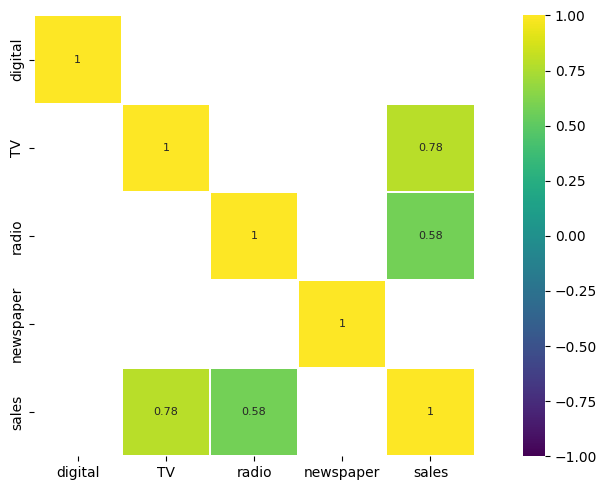

None

In [9]:
corr = advertising_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

In [10]:
advertising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

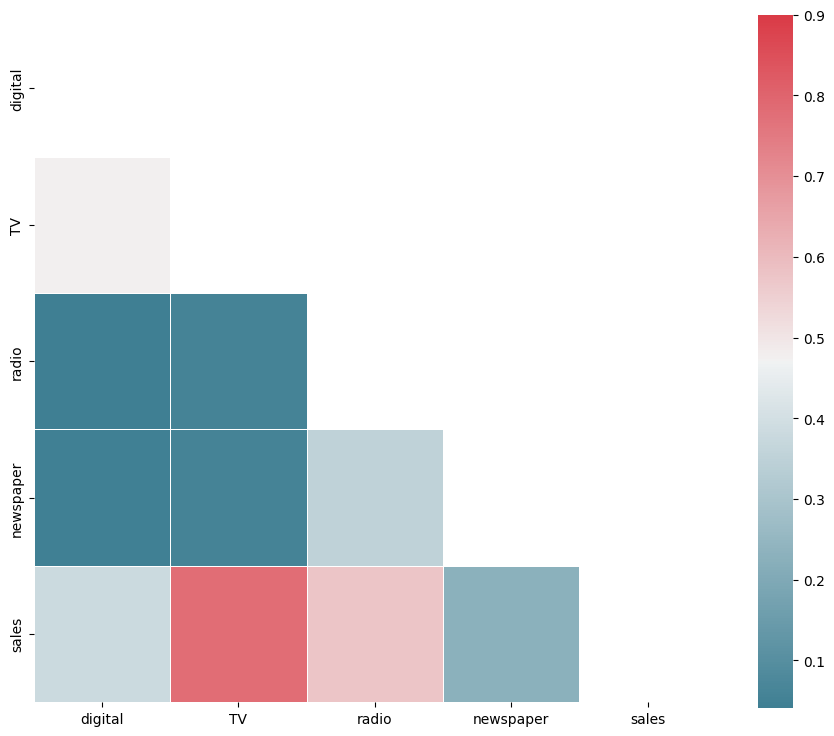

In [12]:
mask = np.zeros_like(advertising_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

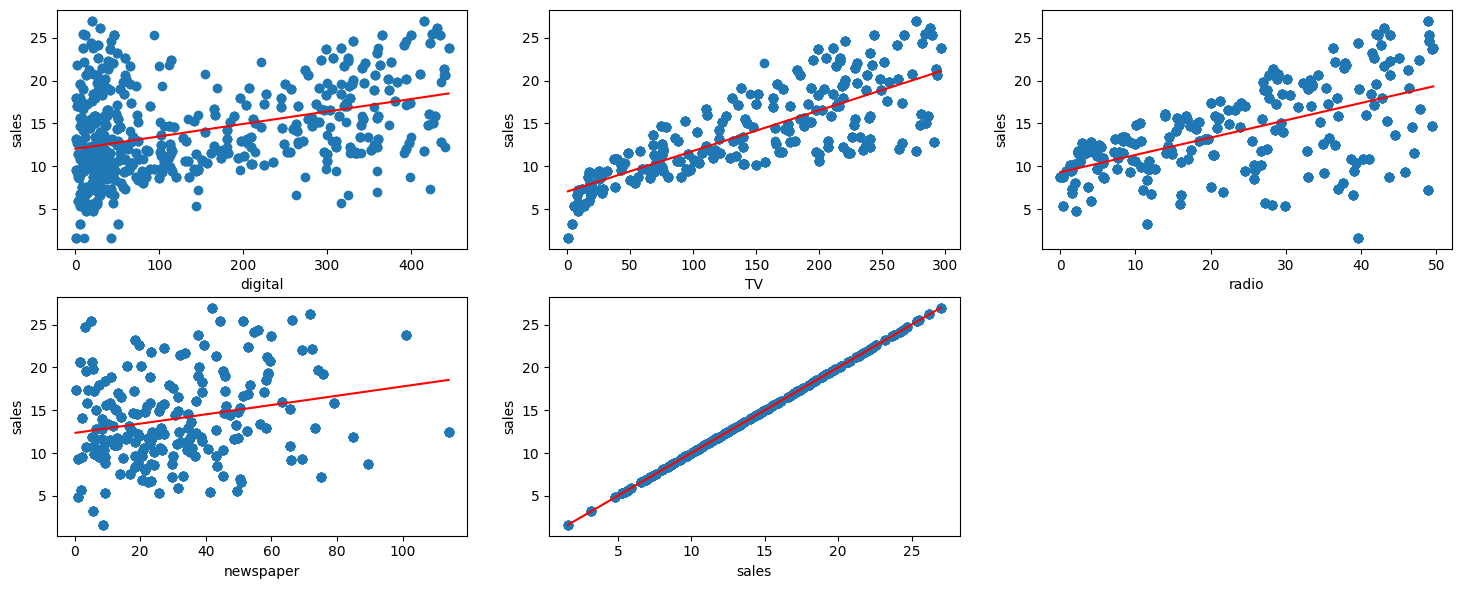

In [23]:
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label

# Training LRM

In [14]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

In [15]:
#feature normalization
normalized_feature =  keras.utils.normalize(X.values)

In [16]:
# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [17]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Building Network #1

In [24]:
model = Sequential([
    Input(shape=(4,)),
    Dense(4, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Fit the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32)

Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 738.9805 - mse: 738.9805 - val_loss: 644.5308 - val_mse: 644.5308
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 589.9075 - mse: 589.9075 - val_loss: 468.8363 - val_mse: 468.8363
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 400.1617 - mse: 400.1617 - val_loss: 340.5515 - val_mse: 340.5515
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 289.4886 - mse: 289.4886 - val_loss: 231.8867 - val_mse: 231.8867
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 190.5873 - mse: 190.5873 - val_loss: 153.6520 - val_mse: 153.6520
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 129.9101 - mse: 129.9101 - val_loss: 104.2966 - val_mse: 104.2966
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.4536 - mse: 91.4536 - val_loss: 73.5165 - val_mse: 73.5165
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60.2761 - mse: 60.2761 - val_loss: 54.6207 - val_mse: 54.6207
Epoch 9/32
23/2

In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119 (480.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80 (324.00 B)

In [26]:
model.evaluate(X_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8075 - mse: 5.8075 


5.675050735473633

<Axes: >

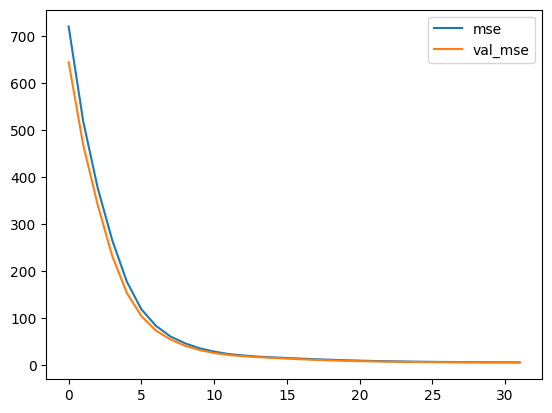

In [27]:
MSE_COLS = ["mse", "val_mse"]

pd.DataFrame(history.history)[MSE_COLS].plot()

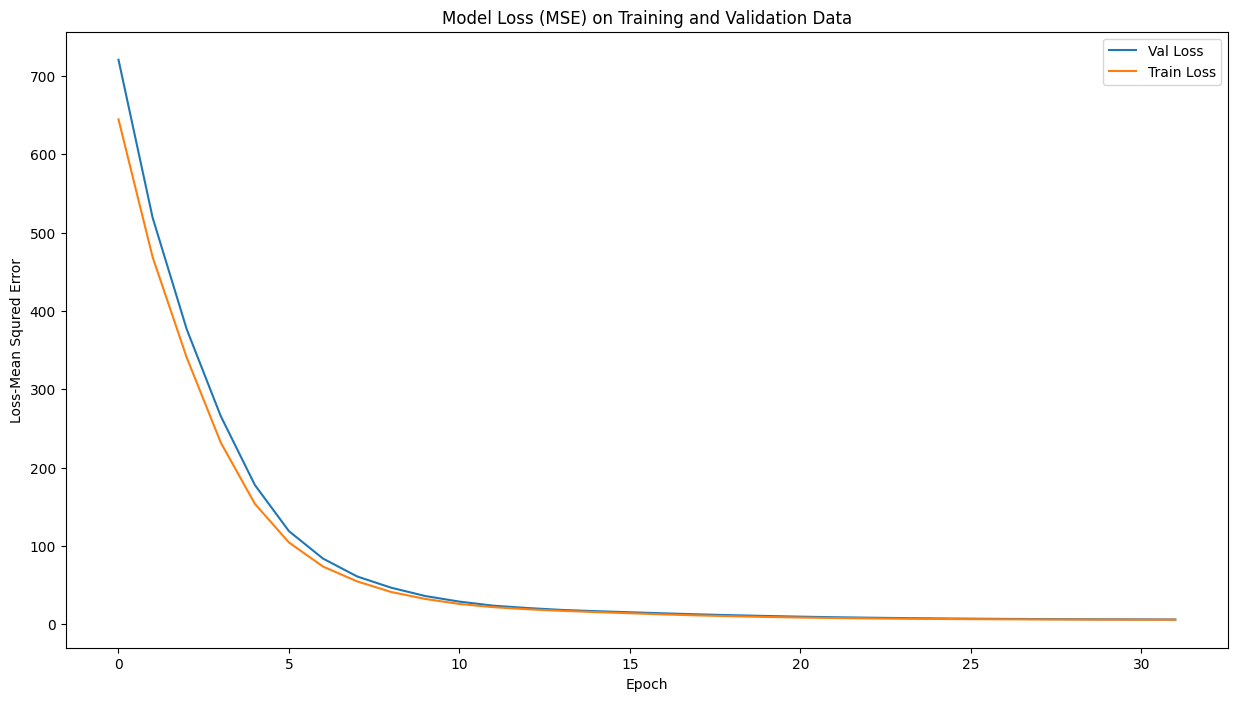

In [28]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

In [29]:
test_predictions = model.predict(X_test).flatten()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [30]:
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(6) 

,True Value,Predicted Value
0,26.2,26.232849
1,19.0,17.332069
2,12.8,18.927828
3,20.8,23.068619
4,16.9,16.581743
5,23.8,27.150484


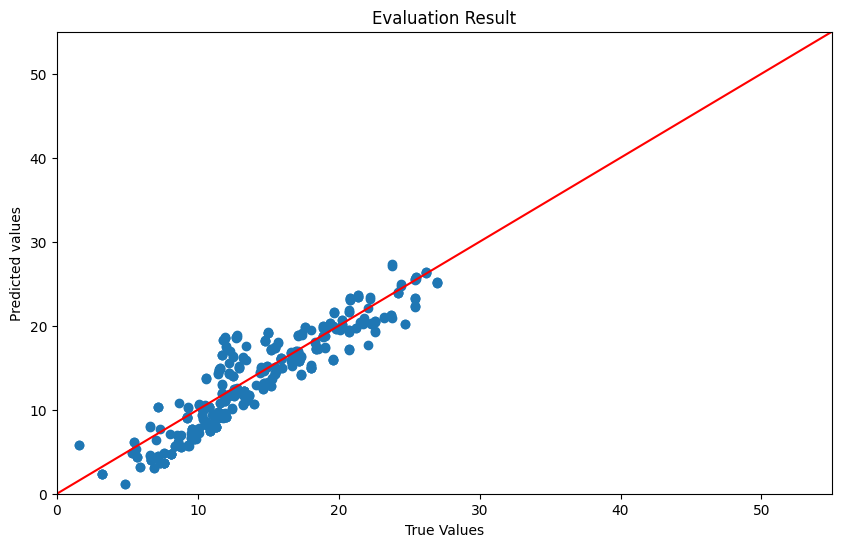

In [31]:
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

<Axes: xlabel='sales'>

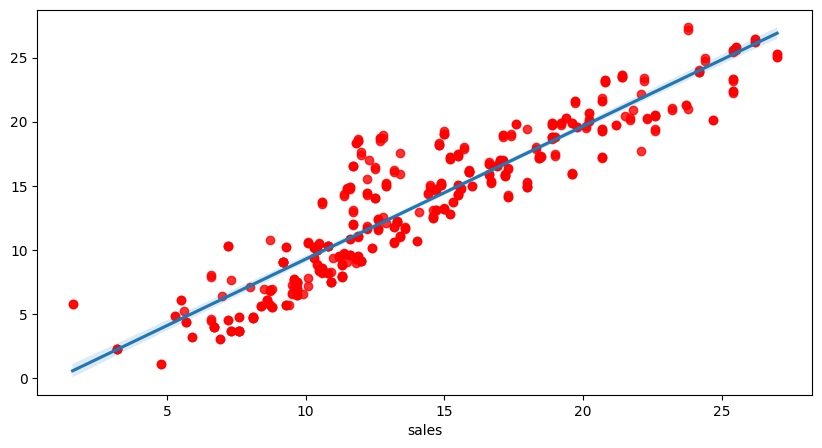

In [32]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

In [33]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2.4282587105341746
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2.382236496183231


# Building Network #2 => decreased epochs amount

In [39]:
model2 = Sequential([
    Input(shape=(4,)),
    Dense(4, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1)
])

# Compile Model
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Fit the Model
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=16)

Epoch 1/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 11707.4121 - mse: 11707.4121 - val_loss: 9326.0918 - val_mse: 9326.0918
Epoch 2/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8227.8408 - mse: 8227.8408 - val_loss: 7283.4990 - val_mse: 7283.4990
Epoch 3/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6013.8809 - mse: 6013.8809 - val_loss: 5758.7915 - val_mse: 5758.7915
Epoch 4/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5135.2949 - mse: 5135.2949 - val_loss: 4556.0635 - val_mse: 4556.0635
Epoch 5/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3841.0984 - mse: 3841.0984 - val_loss: 3676.3040 - val_mse: 3676.3040
Epoch 6/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3360.7656 - mse: 3360.7656 - val_loss: 2961.9404 - val_mse: 2961.9404
Epoch 7/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2730.7656 - mse: 2730.7656 - val_loss: 2407.4226 - val_mse: 2407.4226
Epoch 8/16
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2049.0784 - mse: 2049.0784 - val_loss: 1969

In [40]:
model2.evaluate(X_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 519.7104 - mse: 519.7104 


476.0641174316406

<Axes: >

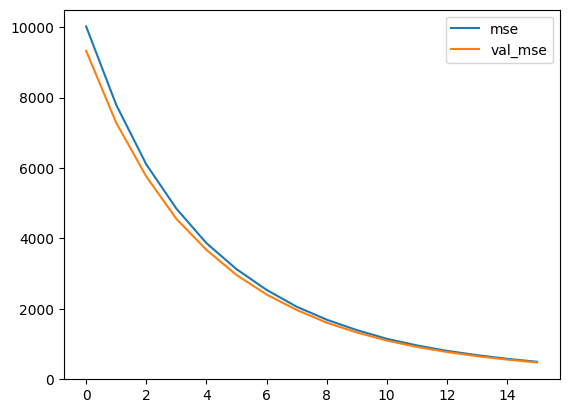

In [41]:
MSE_COLS = ["mse", "val_mse"]

pd.DataFrame(history2.history)[MSE_COLS].plot()

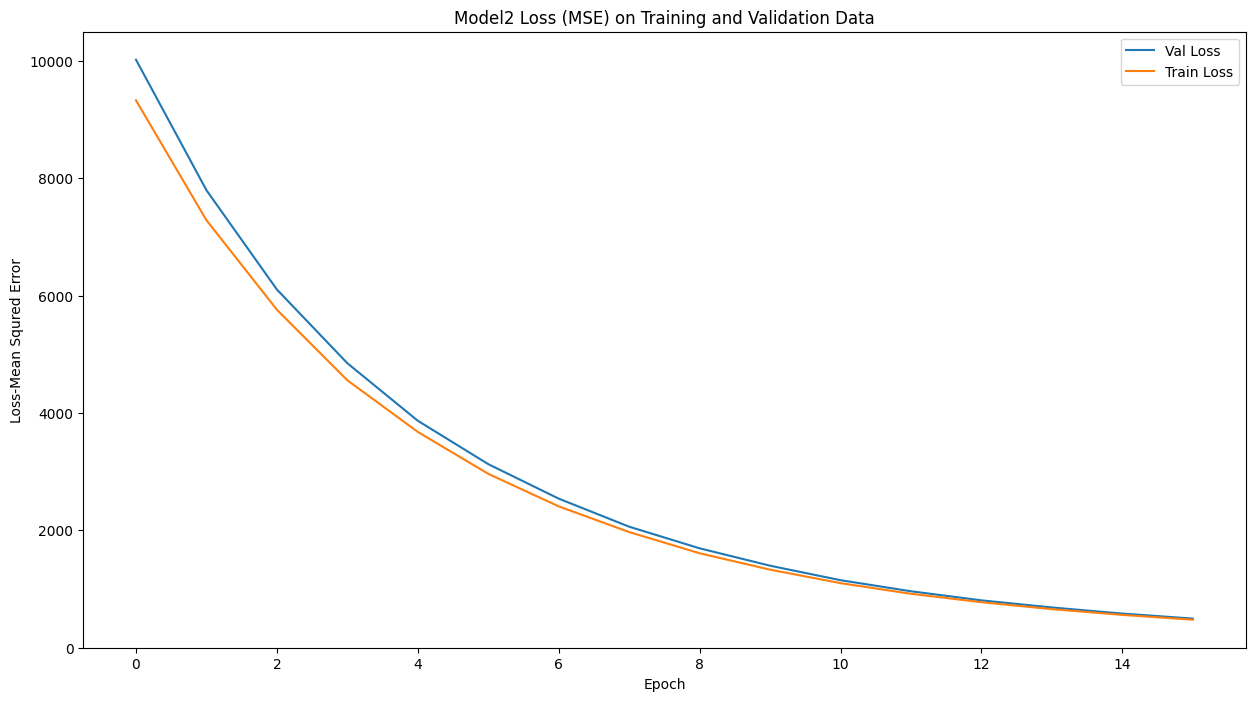

In [42]:
plt.figure(figsize=(15,8))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

In [43]:
test_predictions2 = model2.predict(X_test).flatten()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [44]:
true_predicted2 = pd.DataFrame(list(zip(y_test, test_predictions2)),
                    columns=['True Value','Predicted Value'])
true_predicted2.head(6) 

,True Value,Predicted Value
0,26.2,-32.139874
1,19.0,-18.638018
2,12.8,39.686409
3,20.8,-28.938745
4,16.9,7.885474
5,23.8,-42.354977


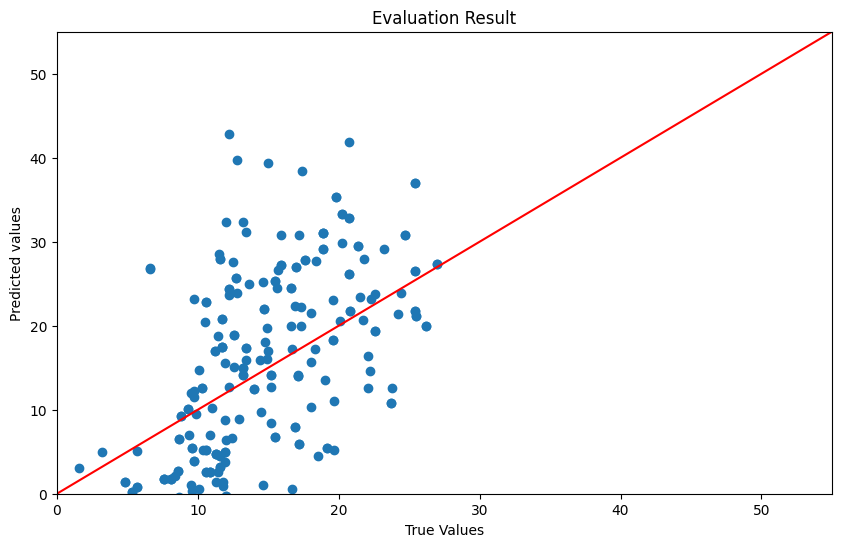

In [45]:
y = test_predictions2 #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

# Building Network #3 => increased epochs amount

In [86]:
model3 = Sequential([
    Input(shape=(4,)),
    Dense(4, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1)
])

# Compile Model
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Fit the Model
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=64)

Epoch 1/64
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6070.1963 - mse: 6070.1963 - val_loss: 4437.4683 - val_mse: 4437.4683
Epoch 2/64
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3922.9053 - mse: 3922.9053 - val_loss: 3003.8704 - val_mse: 3003.8704
Epoch 3/64
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2651.2805 - mse: 2651.2805 - val_loss: 2180.4438 - val_mse: 2180.4438
Epoch 4/64
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1946.1680 - mse: 1946.1680 - val_loss: 1674.2692 - val_mse: 1674.2692
Epoch 5/64
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1433.9297 - mse: 1433.9297 - val_loss: 1318.5173 - val_mse: 1318.5173
Epoch 6/64
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1163.1969 - mse: 1163.1969 - val_loss: 1047.6090 - val_mse: 1047.6090
Epoch 7/64
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 964.4720 - mse: 964.4720 - val_loss: 856.0352 - val_mse: 856.0352
Epoch 8/64
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 771.3323 - mse: 771.3323 - val_loss: 725.9493 - v

In [51]:
model3.evaluate(X_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1892 - mse: 11.1892 


10.515186309814453

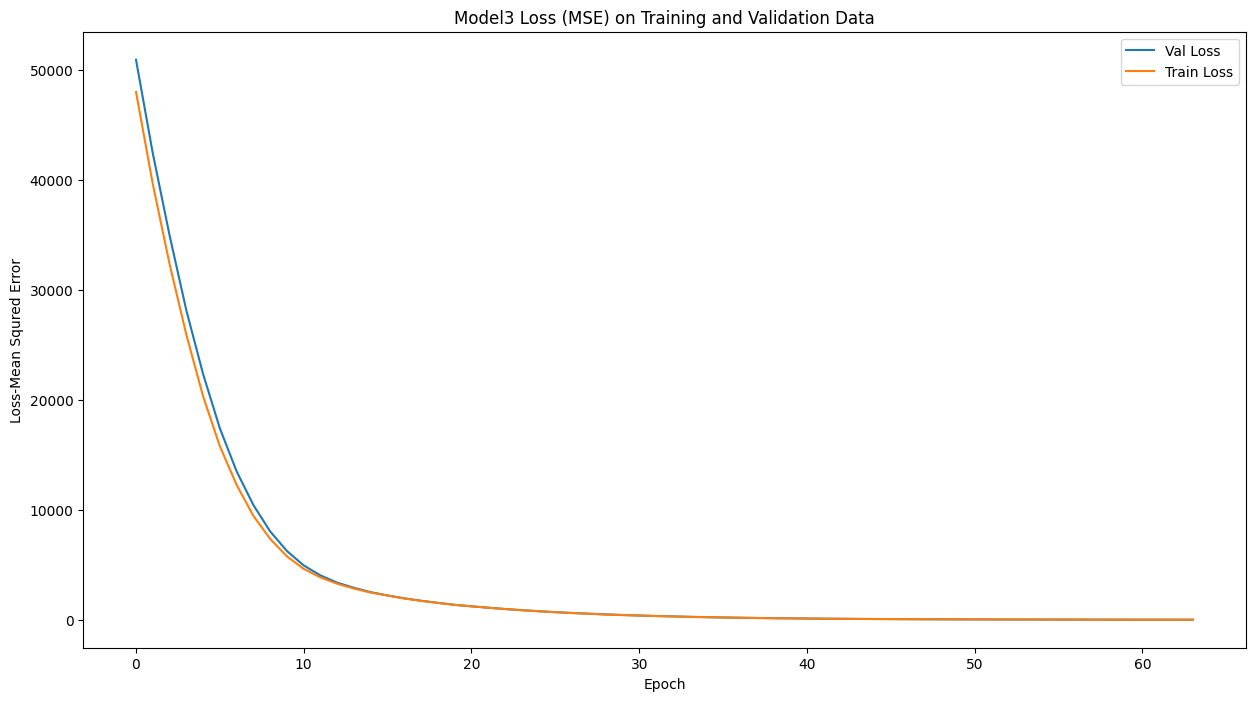

In [52]:
plt.figure(figsize=(15,8))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model3 Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

In [53]:
test_predictions3 = model3.predict(X_test).flatten()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [54]:
true_predicted3 = pd.DataFrame(list(zip(y_test, test_predictions3)),
                    columns=['True Value','Predicted Value'])
true_predicted3.head(6) 

,True Value,Predicted Value
0,26.2,19.446722
1,19.0,14.741494
2,12.8,15.982711
3,20.8,15.582689
4,16.9,16.736588
5,23.8,18.650183


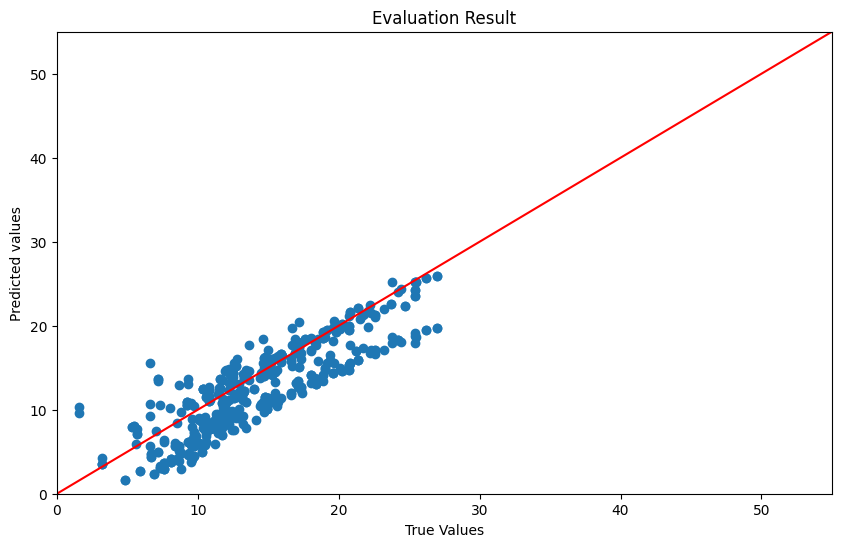

In [55]:
y = test_predictions3 #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

# Building Network #4 => changed activation function to tanh

In [63]:
model4 = Sequential([
    Input(shape=(4,)),
    Dense(4, activation='tanh'),
    Dense(3, activation='tanh'),
    Dense(1)
])

# Compile Model
model4.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Fit the Model
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32)

Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 224.2864 - mse: 224.2864 - val_loss: 233.5752 - val_mse: 233.5752
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 218.4918 - mse: 218.4918 - val_loss: 229.4559 - val_mse: 229.4559
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 220.8063 - mse: 220.8063 - val_loss: 225.2835 - val_mse: 225.2835
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 216.2017 - mse: 216.2017 - val_loss: 220.8228 - val_mse: 220.8228
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 201.4293 - mse: 201.4293 - val_loss: 217.2462 - val_mse: 217.2462
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 191.1863 - mse: 191.1863 - val_loss: 213.9084 - val_mse: 213.9084
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 196.1575 - mse: 196.1575 - val_loss: 210.5899 - val_mse: 210.5899
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 191.5422 - mse: 191.5422 - val_loss: 207.4318 - val_mse: 207.4318
Epoch 9

In [64]:
model4.evaluate(X_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 139.4235 - mse: 139.4235 


138.4636993408203

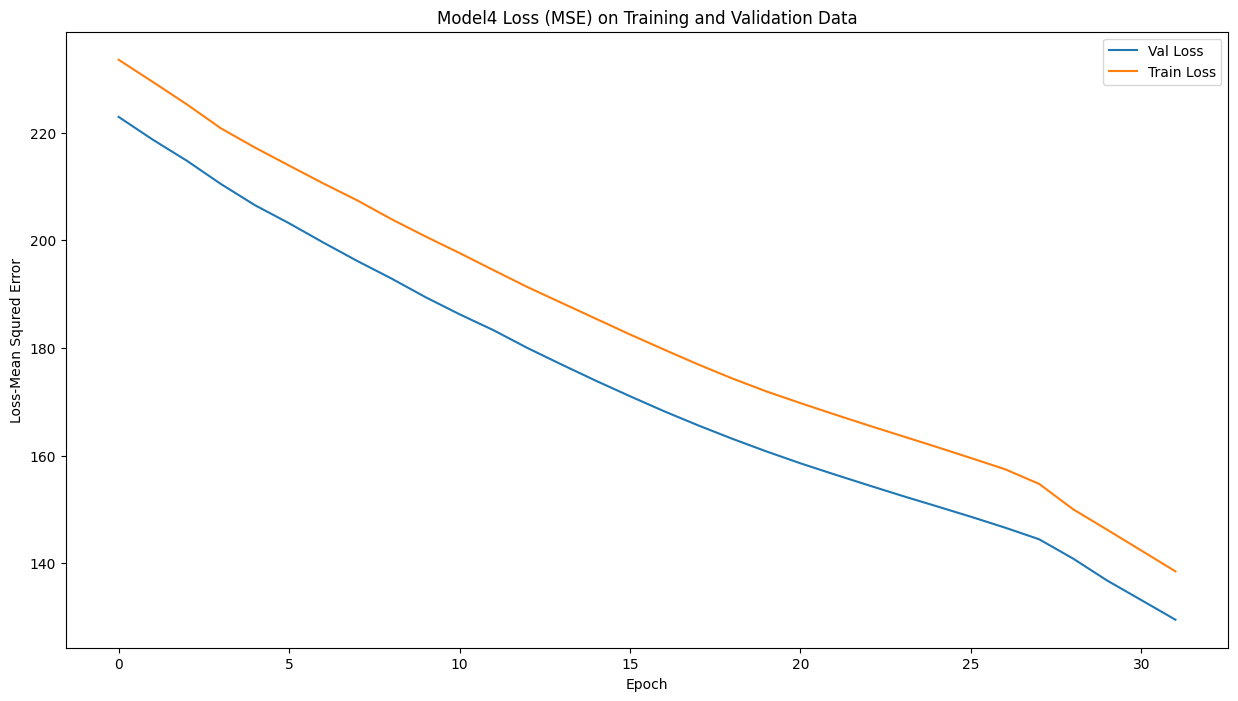

In [65]:
plt.figure(figsize=(15,8))
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model4 Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

In [66]:
test_predictions4 = model4.predict(X_test).flatten()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [67]:
true_predicted4 = pd.DataFrame(list(zip(y_test, test_predictions4)),
                    columns=['True Value','Predicted Value'])
true_predicted4.head(6) 

,True Value,Predicted Value
0,26.2,4.185494
1,19.0,4.185494
2,12.8,3.436537
3,20.8,4.185494
4,16.9,3.436537
5,23.8,4.185494


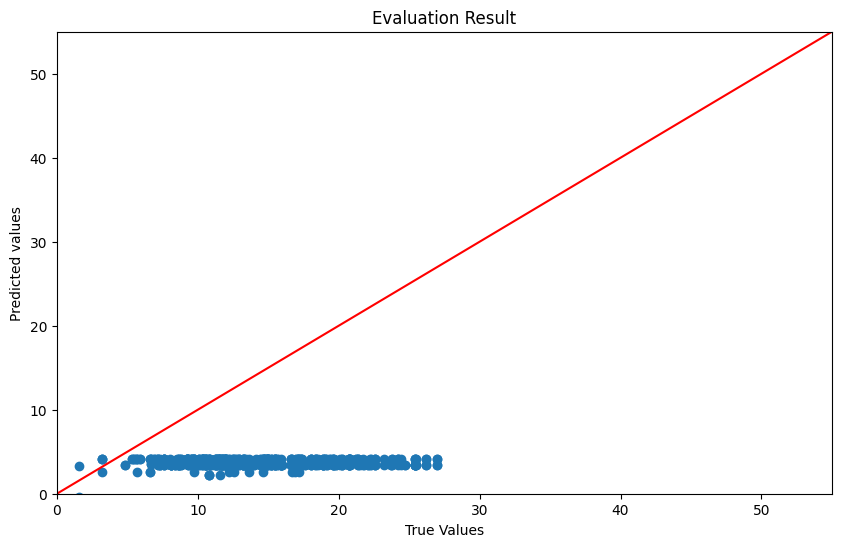

In [68]:
y = test_predictions4 #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

# Building Network #5 => increased learning rate of optimizer

In [79]:
model5 = Sequential([
    Input(shape=(4,)),
    Dense(4, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1)
])

# Compile Model
model5.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

# Fit the Model
history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32)

Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 776.4056 - mse: 776.4056 - val_loss: 49.0965 - val_mse: 49.0965
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.3517 - mse: 50.3517 - val_loss: 22.7538 - val_mse: 22.7538
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8167 - mse: 17.8167 - val_loss: 10.1616 - val_mse: 10.1616
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.7246 - mse: 10.7246 - val_loss: 7.0059 - val_mse: 7.0059
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6172 - mse: 6.6172 - val_loss: 5.4658 - val_mse: 5.4658
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7308 - mse: 5.7308 - val_loss: 5.9392 - val_mse: 5.9392
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4077 - mse: 6.4077 - val_loss: 6.3708 - val_mse: 6.3708
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9635 - mse: 6.9635 - val_loss: 6.7794 - val_mse: 6.7794
Epoch 9/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

In [80]:
model5.evaluate(X_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9429 - mse: 4.9429 


4.850826740264893

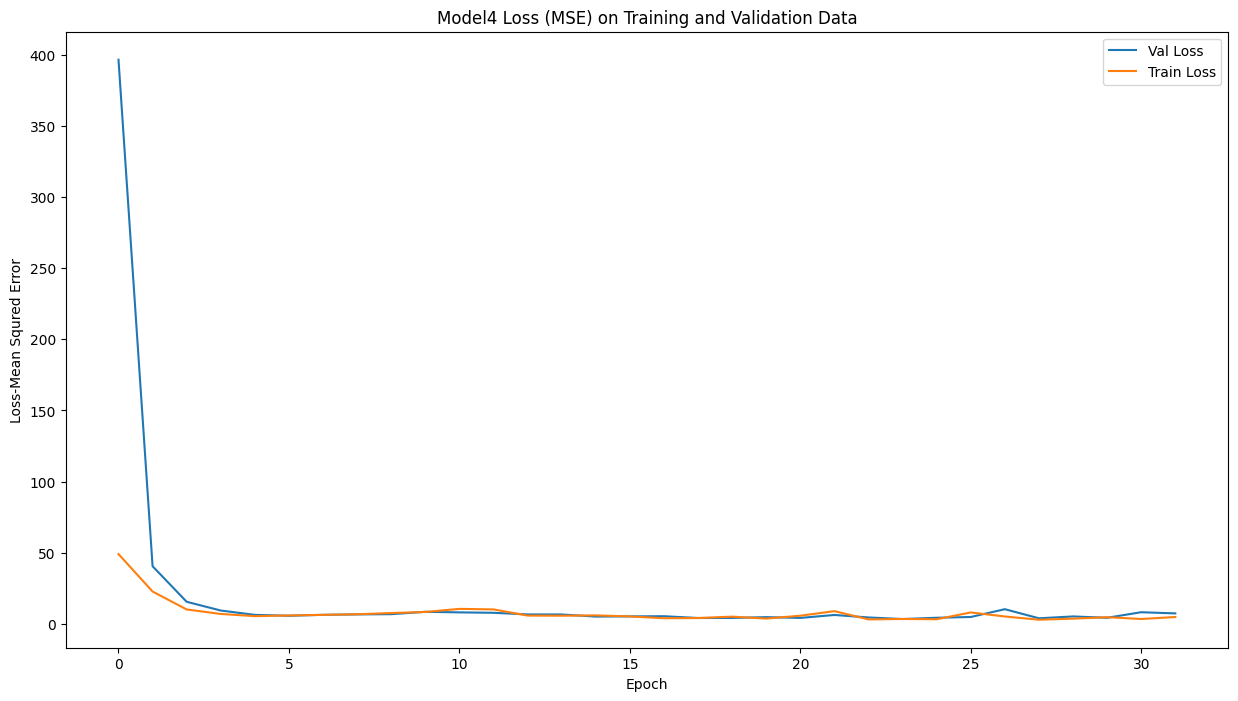

In [81]:
plt.figure(figsize=(15,8))
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model4 Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

In [82]:
test_predictions5 = model5.predict(X_test).flatten()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [83]:
true_predicted5 = pd.DataFrame(list(zip(y_test, test_predictions5)),
                    columns=['True Value','Predicted Value'])
true_predicted5.head(6) 

,True Value,Predicted Value
0,26.2,23.150209
1,19.0,17.847721
2,12.8,13.498434
3,20.8,19.707256
4,16.9,15.035573
5,23.8,22.277313


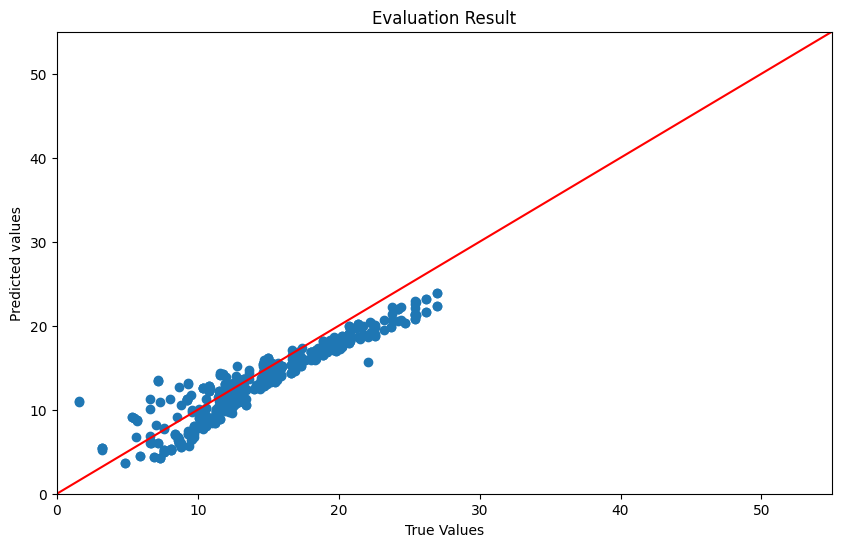

In [84]:
y = test_predictions5 #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

# Summary

In [85]:
results = []

def evaluate_model(model_name, model_predictions, X_test, y_test):  
    
    mae = mean_absolute_error(y_test, model_predictions)
    mse = mean_squared_error(y_test, model_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, model_predictions)
    
    results.append({
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    })

evaluate_model("Model #1", test_predictions, X_test, y_test)
evaluate_model("Model #2", test_predictions2, X_test, y_test)
evaluate_model("Model #3", test_predictions3, X_test, y_test)
evaluate_model("Model #4", test_predictions4, X_test, y_test)
evaluate_model("Model #5", test_predictions5, X_test, y_test)



df_results = pd.DataFrame(results)

print(df_results)

      Model        MAE         MSE       RMSE   R² Score
0  Model #1   1.937012    5.675051   2.382236   0.798168
1  Model #2  17.414721  476.064118  21.818894 -15.931104
2  Model #3   2.648218   10.515186   3.242713   0.626030
3  Model #4  10.524167  138.463704  11.767060  -3.924428
4  Model #5   1.848476    4.850826   2.202459   0.827482


# Model Performance Summary  

The performance of five different models was evaluated based on Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score, showcasing various configurations and adjustments:  

| Model     | MAE        | MSE        | RMSE       | R² Score   | Description                                      | Possible Impact of Changes                               |  
|-----------|------------|------------|------------|------------|--------------------------------------------------|--------------------------------------------------------|  
| **Model #1** | **1.937**   | **5.675**   | **2.382**   | **0.798**   | **Base model**: Strong performance with low error metrics and a high R² score, indicating it explains the variance in the target well. | Established effective baseline performance; optimal balance of training iterations and parameter settings. |  
| **Model #2** | 17.415     | 476.064    | 21.819     | -15.931    | **Decreased epochs by 50%**: Poor performance with extremely high error metrics and a negative R² score, indicating the model failed to learn effectively. | Reducing epochs likely led to underfitting, where the model didn't train long enough to capture patterns in the data. |  
| **Model #3** | 2.648      | 10.515     | 3.243      | 0.626      | **Increased epochs by 100%**: Moderate performance with improved RMSE but lower explanatory power. | While increasing epochs helped, it may have not sufficiently optimized the learning process or may have resulted in diminishing returns. |  
| **Model #4** | 10.524     | 138.464    | 11.767     | -3.924     | **Changed activation function from ReLU to Tanh**: Resulted in significantly higher error metrics and a negative R² score. | Switching to Tanh may have led to vanishing gradients, especially if the input values weren't properly normalized; this makes learning slow or ineffective. |  
| **Model #5** | 1.848      | 4.851      | 2.202      | 0.827      | **Increased learning rate from 0.001 to 0.01**: Improved performance, yielding the lowest MAE and RMSE, with the highest R² score. | A higher learning rate can accelerate convergence, allowing the model to better explore the parameter space, leading to more effective learning. However, it requires careful balance to avoid overshooting. |  

## Key Insights  

- **Model #1** serves as the baseline with strong performance, demonstrating optimal training iterations and parameter settings.  
- **Model #2**, which reduced training epochs, experienced significantly worse performance, indicating that fewer epochs hindered the model’s ability to learn critical data patterns, resulting in underfitting.  
- **Model #3** showed some improvement in RMSE with increased epochs, but the R² score remained moderate, suggesting the changes might not fully capitalize on available data or indicate overfitting as learning was prolonged without significant improvement.  
- **Model #4**'s change in activation function negatively impacted performance due to potential issues like vanishing gradients, which inhibited the model's learning capability. This highlights the significance of selecting appropriate activation functions based on the distribution of input data.  
- **Model #5**, which adjusted the learning rate, resulted in the best performance. A higher learning rate allowed for quicker convergence to an optimal solution, but careful adjustments were vital to maintain stability and prevent divergence during training.  

## Conclusion  

Model #5 emerged as the best-performing configuration due to its effective learning rate, while Model #2 and Model #4 displayed significant deficiencies. The results emphasize the importance of hyperparameter tuning, as different configurations can lead to vastly different model performances.  